In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flikr-data/captions.txt
/kaggle/input/flikr-data/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/flikr-data/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/flikr-data/Images/2366643786_9c9a830db8.jpg
/kaggle/input/flikr-data/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/flikr-data/Images/2190227737_6e0bde2623.jpg
/kaggle/input/flikr-data/Images/2752809449_632cd991b3.jpg
/kaggle/input/flikr-data/Images/3097776588_312932e438.jpg
/kaggle/input/flikr-data/Images/1206506157_c7956accd5.jpg
/kaggle/input/flikr-data/Images/1319634306_816f21677f.jpg
/kaggle/input/flikr-data/Images/2465218087_fca77998c6.jpg
/kaggle/input/flikr-data/Images/3351493005_6e5030f596.jpg
/kaggle/input/flikr-data/Images/2949337912_beba55698b.jpg
/kaggle/input/flikr-data/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/flikr-data/Images/3543600125_223747ef4c.jpg
/kaggle/input/flikr-data/Images/2174206711_11cb712a8d.jpg
/kaggle/input/flikr-data/Images/280706862_14c30d734a.jpg
/kaggle/input/flikr-data/Images/21007

## Importing the libraries

In [4]:
import os
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array



## Extract the features from images

In [5]:
model =VGG16()

553467096/553467096 [==============================] - 3s 0us/step


### Since VGG16 is a image classifiaction model it has softmax as output layer. We don't require that layer.

In [6]:
from keras import Model

In [7]:
model = Model(inputs=model.inputs,outputs=model.layers[-2].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
BASE_DIR = '/kaggle/input/flikr-data'
WORKING_DIR = '/kaggle/working'

In [9]:
import tqdm

In [10]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'Images')

for img_name in (os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

## Pickling the features dictionary

In [11]:
import pickle

In [12]:
pickle.dump(features,open(os.path.join(WORKING_DIR,"features_dict.pkl"),"wb"))

## Loading the features dictionary

In [13]:
features = pickle.load(open(os.path.join(WORKING_DIR,"features_dict.pkl"),"rb"))

## All the features are loaded.So we need to process the captions now

* reading the captions file

In [14]:
df = pd.read_csv("/kaggle/input/flikr-data/captions.txt")

In [15]:
df

image  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                 caption  
0      A child in a pink dress is climbing up a set o...  
1                  A girl going into a wooden building .  
2       A little girl climbing into a wooden playhouse .  
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451           A man is rock climbing high in the air .  
40452  A person in a red shirt climbing up a rock fac...  
40453                    A rock climber in a red shirt .  
40454  A rock climber practices on a rock climbing wa...  

[40455 rows x 2 columns]

In [16]:
df.head(6)

image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   
5  1001773457_577c3a7d70.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  
5         A black dog and a spotted dog are fighting

In [17]:
image = load_img("/kaggle/input/flikr-data/Images/1000268201_693b08cb0e.jpg")

In [18]:
import matplotlib.pyplot as plt

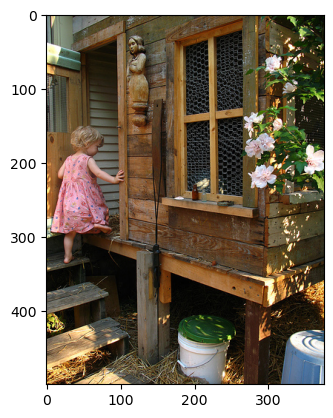

In [19]:
plt.imshow(image)

## This image captions are

In [20]:
df.iloc[0:5]["caption"]

0    A child in a pink dress is climbing up a set o...
1                A girl going into a wooden building .
2     A little girl climbing into a wooden playhouse .
3    A little girl climbing the stairs to her playh...
4    A little girl in a pink dress going into a woo...
Name: caption, dtype: object

## We have to map the captons to the corresponding images

## So every image has 5 captions 

In [21]:
captions={}

In [22]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [23]:
captions_doc

'1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .\n1000268201_693b08cb0e.jpg,A girl going into a wooden building .\n1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .\n1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .\n1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .\n1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting\n1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .\n1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .\n1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .\n1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .\n1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .\n1002674143_1b742ab4b8.j

In [24]:
cap_list=captions_doc.split("\n")

In [25]:
cap_list[0]

'1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .'

In [26]:
cap_list[0].split(",")

['1000268201_693b08cb0e.jpg',
 'A child in a pink dress is climbing up a set of stairs in an entry way .']

In [27]:
for cap in cap_list:
    token=cap.split(",")
    if len(cap) < 2:
        continue
    img_id=token[0]
    caption=token[1:]
    img_id = img_id.split(".")[0]
    caption = " ".join(caption)
    
    if img_id not in captions:
        captions[img_id] = []
    
    captions[img_id].append(caption)
    

In [28]:
len(captions)

8091

## one caption does not have image for it so i included the len(cap)<2 to skip the caption

In [29]:
len(features)

8091

## Text Preprocessing

In [30]:
import nltk
import re
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def clean(captions):
    for key,captions in captions.items():
        for i in range(len(captions)):
            caption= captions[i]
            caption = caption.lower()
            caption = caption.replace("[^A-Za-z]","")
            caption = caption.replace("\s+"," ")
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i]=caption

In [32]:
captions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [33]:
clean(captions)

In [34]:
captions["1000268201_693b08cb0e"]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [35]:
all_captions=[]
for key in captions:
    for caption in captions[key]:
        all_captions.append(caption)

In [36]:
len(all_captions)

40455

In [37]:
all_captions[0:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [39]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [40]:
vocab_size

8485

In [41]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

## Train and test split

In [42]:
image_ids = list(captions.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

## Creating the Data Generator function

In [43]:
example = all_captions[112]

In [44]:
example

'startseq black dog has blue toy in its mouth endseq'

## To encode the text to number we use text to sequences

In [45]:
example


'startseq black dog has blue toy in its mouth endseq'

In [46]:
seq = tokenizer.texts_to_sequences([example])[0]

In [47]:
print(seq)

[1, 14, 8, 108, 29, 104, 3, 74, 68, 2]


In [48]:
len(seq)

10

In [49]:
for i in range(1, len(seq)):
    in_seq, out_seq = seq[:i], seq[i]
    print(in_seq,"out",out_seq)

[1] out 14
[1, 14] out 8
[1, 14, 8] out 108
[1, 14, 8, 108] out 29
[1, 14, 8, 108, 29] out 104
[1, 14, 8, 108, 29, 104] out 3
[1, 14, 8, 108, 29, 104, 3] out 74
[1, 14, 8, 108, 29, 104, 3, 74] out 68
[1, 14, 8, 108, 29, 104, 3, 74, 68] out 2


In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

In [51]:
for i in range(1,9):
    print("*********")
    in_seq, out_seq = seq[:i], seq[i]
    print(in_seq,"out",out_seq)
    in_seq = pad_sequences([in_seq], maxlen=max_length)
    print("The input seq is",in_seq)
  
    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
    print("The out seq is",out_seq)

*********
[1] out 14
The input seq is [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
The out seq is [0. 0. 0. ... 0. 0. 0.]
*********
[1, 14] out 8
The input seq is [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  1 14]]
The out seq is [0. 0. 0. ... 0. 0. 0.]
*********
[1, 14, 8] out 108
The input seq is [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  1 14  8]]
The out seq is [0. 0. 0. ... 0. 0. 0.]
*********
[1, 14, 8, 108] out 29
The input seq is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   1  14   8 108]]
The out seq is [0. 0. 0. ... 0. 0. 0.]
*********
[1, 14, 8, 108, 29] out 104
The input seq is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   1  14   8 108  29]]
The out seq is [0. 0. 0. .

In [52]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

## Creating the model using encoder techniques

In [54]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

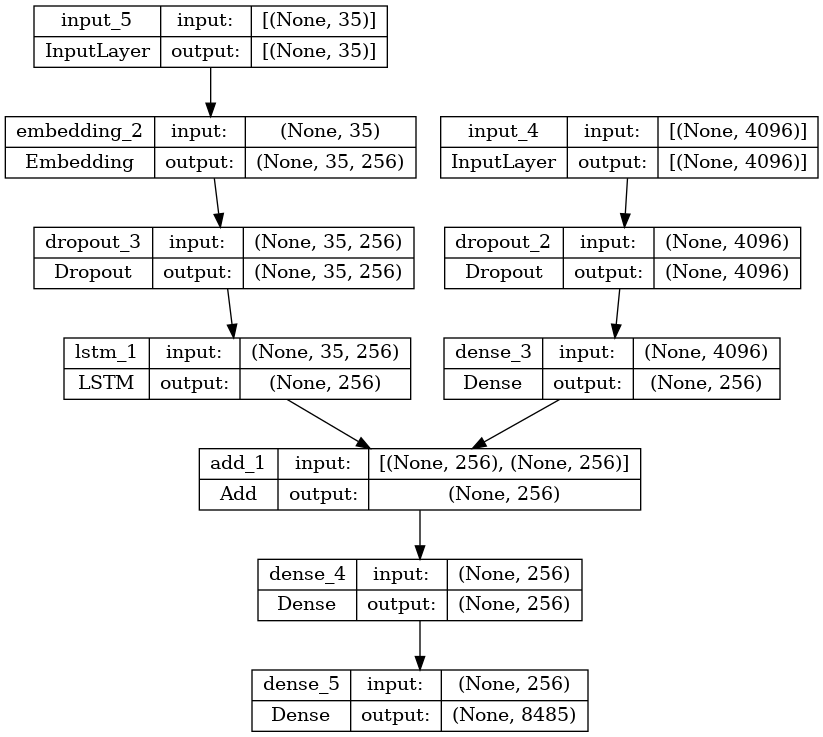

In [77]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

## visualizing the embedding  layer

In [64]:
embed = ["i am data scientist",
        "i love NLP",
        "I am currently looking for job"]

In [65]:
voc_size=100

In [69]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 0  0  0  0 81 46 25 33]
 [ 0  0  0  0  0 81 92 38]
 [ 0  0 81 46 74 46 30 50]]


In [68]:

from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in embed] 
print(onehot_repr)

[[81, 46, 25, 33], [81, 92, 38], [81, 46, 74, 46, 30, 50]]


In [71]:
from tensorflow.keras.models import Sequential

In [72]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 8, 10)             1000      
                                                                 
Total params: 1,000
Trainable params: 1,000
Non-trainable params: 0
_________________________________________________________________


In [74]:

print(model.predict(embedded_docs))

1/1 [==============================] - 0s 52ms/step
[[[ 0.00641198  0.02048827 -0.01242894  0.04720941 -0.04350565
    0.00720578 -0.02006954  0.04209835 -0.03371914 -0.0218756 ]
  [ 0.00641198  0.02048827 -0.01242894  0.04720941 -0.04350565
    0.00720578 -0.02006954  0.04209835 -0.03371914 -0.0218756 ]
  [ 0.00641198  0.02048827 -0.01242894  0.04720941 -0.04350565
    0.00720578 -0.02006954  0.04209835 -0.03371914 -0.0218756 ]
  [ 0.00641198  0.02048827 -0.01242894  0.04720941 -0.04350565
    0.00720578 -0.02006954  0.04209835 -0.03371914 -0.0218756 ]
  [ 0.03471081  0.00185175  0.02288873 -0.04461328 -0.00058504
   -0.00040243 -0.02628489 -0.00024354 -0.02366364  0.01382272]
  [ 0.01381261 -0.02837703 -0.01136871  0.00309795  0.00237002
    0.01576677 -0.01529114  0.03946427  0.03314657  0.00885222]
  [-0.02477765  0.03623867  0.04856708  0.02088429  0.04539222
   -0.03263908  0.0062206  -0.02973945 -0.04504777  0.00055556]
  [-0.01588068 -0.03373658  0.00898234  0.03673476 -0.02820

## Train the model

In [78]:

epochs = 15
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, captions, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 63s 278ms/step - loss: 2.3318


## Save the model

In [79]:
model.save(WORKING_DIR+'/caption_model.h5')

## Test the output

In [80]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [95]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

In [111]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    sentences = features[image_id]
    print('---------------------Actual---------------------')
    for caption in sentences:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
[1.4995995 0.        0.        ... 0.        2.0441825 0.       ]
--------------------Predicted--------------------
startseq two dogs are running in grassy field endseq


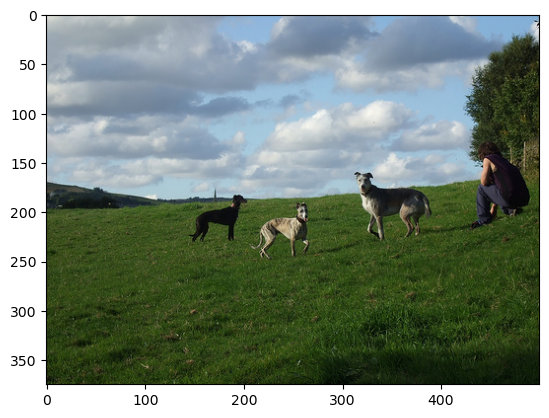

In [115]:

generate_caption("1032122270_ea6f0beedb.jpg")

---------------------Actual---------------------
[0.        1.6774545 0.        ... 0.        1.2312145 0.       ]
--------------------Predicted--------------------
startseq boy holding baby eats pizza endseq


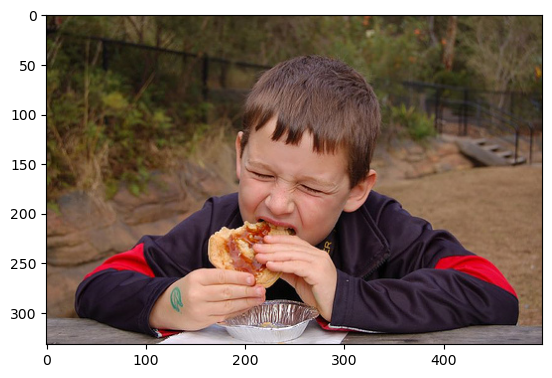

In [117]:

generate_caption("1034276567_49bb87c51c.jpg")

In [149]:

from nltk.translate.bleu_score import sentence_bleu
# validate with test data
actual=["boy holding baby eats pizza ".split()]
predicted = "boy is eating pizza".split()

    

In [153]:
print("BLEU-1: %f" % sentence_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))

BLEU-1: 0.389400
